# ABSTRACTION

Tìm số Fibonacci Fib(k) với k max là 10^17.


# PARTERN RECOGNITION

Tính tay số cá thể qua 5 ngày, ta được công thức và kết luận sau:

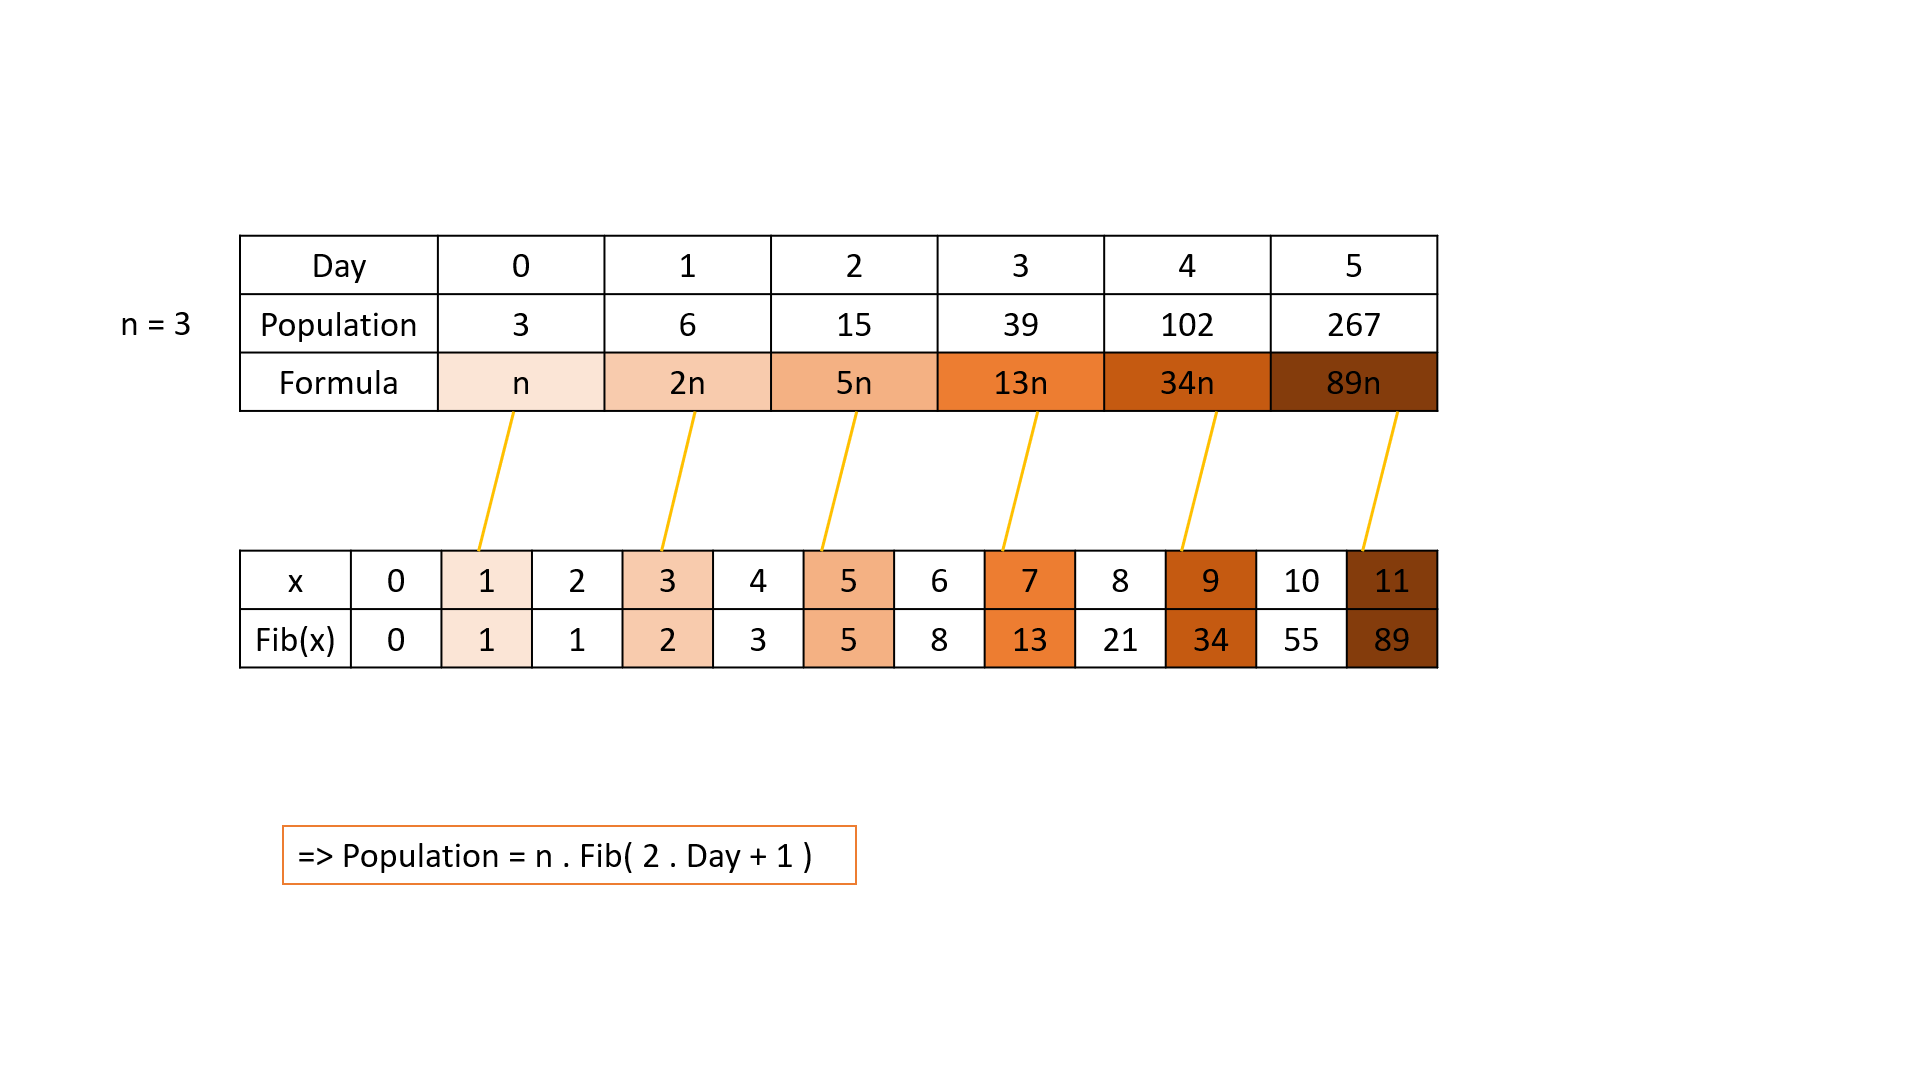

Ta thấy các hệ số của công thức tính tổng cá thể tại ngày k trùng với số Fibonacci với tham số 2k+1.

=> Pattern: Tìm số fib(2k+1)


# ALGORITHM DESGIN + IMPLEMENTATION

    Input: 
        n (số nguyên): số cá thể ban đầu. (1 ≤ n ≤ 1000)
        k (số nguyên): số ngày sinh trưởng (1 ≤ k ≤ 10^18)
    Output:
        result (số nguyên): tổng cá thể sau k ngày sinh trưởng.
    
## *a. Naive Approach:*
    
    Temp:
        temp (số nguyên): biến lưu tổng cá thể ngày hôm trước. (initialize: temp=0)
        m (số nguyên): biến đếm số lần lặp (0 ≤ m < k)
    
    Ý tưởng: Gọi số cá thể tại ngày k là P(k)(Khởi tạo P(0) = n) và 1 biến temp (Khởi tạo temp = 0) lưu số cả thể sinh ra trong ngày k. Vậy P(k) = temp + P(k-1) chính là output result cần tìm.


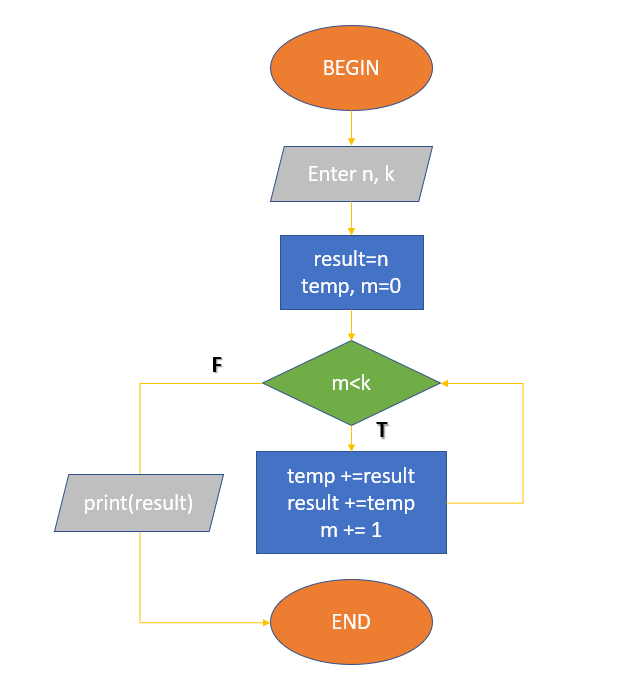

Độ phức tạp: O(k) => Worst case: O(10^17) => Không thỏa Time Complexity 1s



In [21]:
#Naive Approach
n,k = map(int, input().split())

def compute(n,k):
    result=n
    temp=0
    for m in range(0,k):
        temp=temp+result
        result=result+temp 
    return result

print(compute(n,k)%(10**9+7))

3 2
15


## *b. Fibonacci - Đệ Quy*

Ta có công thức tính số Fibonacci như sau:

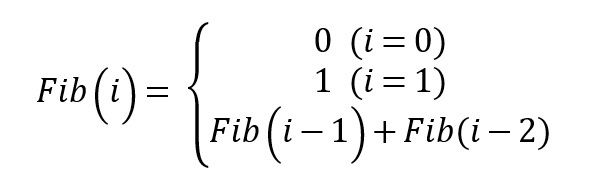

Theo đó, ta dễ dàng viết đoạn chương trình như sau:

In [20]:
#Recursion Fib
n,k = map(int, input().split())
def Fib(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return Fib(n-1) +Fib(n-2)
    
print(n*Fib(k*2+1))

3 2
15


Tuy nhiên, Time Comlexity cho giải thuật trên là O(k^2) chắc chắn không thỏa yêu cầu bài toán.

## *c. Fibonacci - Nhân ma trận và Lũy thừa nhanh*

Ta có dãy Fibonacci dạng ma trận như sau:

${\begin{pmatrix}1&1\\1&0\end{pmatrix}}^{k}=\begin{pmatrix}F_{k+1}&F_{k}\\F_{k}&F_{k-1}\end{pmatrix}$


=> Đi tính ${\begin{pmatrix}1&1\\1&0\end{pmatrix}}^{k}$.

Nếu dùng loop thì Time Complexity là O(k) 

=> Không thỏa yêu cầu bài toán.

=> Dùng lũy thừa nhanh:
    
    - Ý tưởng: tính a^n = (a^n/2)^2, a^n/2 = (a^n/4)^2 ... a^1 = a và a^0 = 1. Thay vì lặp n lần (Độ phức tạp là O(n)) thì ta chỉ cần lặp log_2(n). => Độ phức tạp: O(log(k))
 Vậy implementation của giải thuật **c** này gồm 3 bài toán nhỏ: 
+ Tìm số Fibonacci ở dạng ma trận.
+ Nhân ma trận.
+ Lũy thừa nhanh.

In [19]:
#Matrix Fib + FastPower
n,k = map(int, input().split())

def Fib(k):
    F = [[1,1],[1,0]]
    if k == 0:
        return 0
    
    F = fast_power(F, k-1)
    
    return F[0][0]

def matrix_multiply(F, M):
    x = (F[0][0] * M[0][0] + F[0][1] * M[1][0]) 
    y = (F[0][0] * M[0][1] + F[0][1] * M[1][1]) 
    z = (F[1][0] * M[0][0] + F[1][1] * M[1][0]) 
    w = (F[1][0] * M[0][1] + F[1][1] * M[1][1]) 
      
    F[0][0] = x 
    F[0][1] = y 
    F[1][0] = z 
    F[1][1] = w 
    
    return F
          
def fast_power(F,k):
    if k==0 or k==1: 
        return F
    else:
        M = [[1,1],[1,0]]
        F = fast_power(F, k//2) 
        F = matrix_multiply(F, F) 
        
        if(k%2!=0):
            F = matrix_multiply(F,M)
        
    return F
        
print(n*Fib(2*k+1)%(10**9+7))

3 3
39
